# E198K FAH data

## Attempt 1 

In [ ]:
# N_states	4
# Number of Trials	10
# Num Feature Input	1000
# Feature Input	Select features filtered by spectral oASIS
# Learning Rate	1.00E-03
# Mode	regularize
# Beta	0.01
# Feat_dim	3
# Pretrain	50
# N_epochs	60
# Lagtime	10

### VAMP-2 Loss

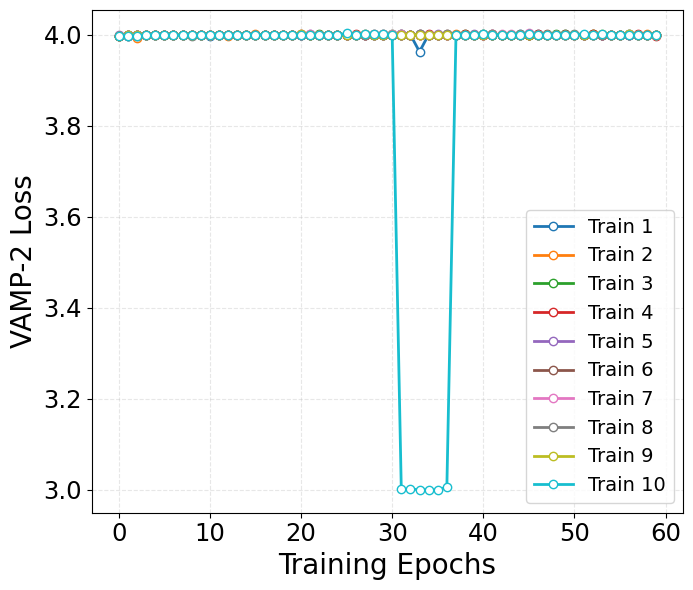

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 1
system = "E198K"
num_states=4

val_vamp = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_vamp.npy'
    dip = np.load(file_path)
    val_vamp.append(dip)

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'

# Plot with custom colors, line width, and markers
fig = plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_vamp):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels 
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('VAMP-2 Loss', fontsize=20)

#plt.yticks(np.arange(1.95, 2.011, 0.01))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=14, markerscale=1, ncol=1)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_VAMP_{system}.png', dpi=900, bbox_inches='tight')


### Dispersion Loss

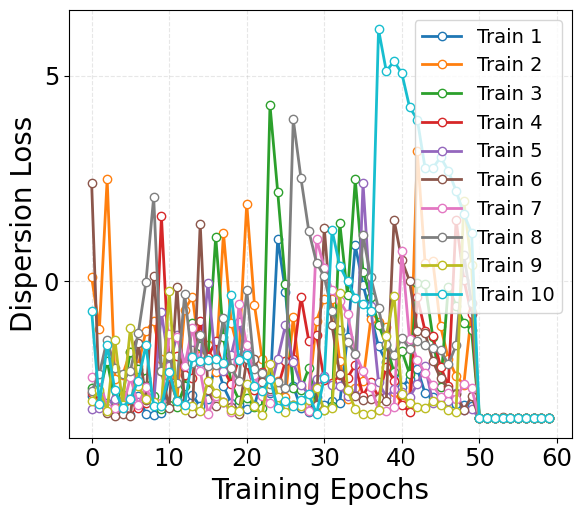

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'
#marker_edge = 'royalblue'

attempt = 1
system = "E198K"
num_states=4

val_dip = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_dis.npy'
    dip = np.load(file_path)
    val_dip.append(dip)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_dip):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('Dispersion Loss', fontsize=20)
#plt.ylim(0, 2.25)
#plt.yticks(np.arange(0, 2.1, 0.5))
plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)
plt.legend(loc='upper right', fontsize=14, markerscale=1, ncol=1)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_DISP_{system}.png', dpi=900, bbox_inches='tight')

### Plotting Hypersphere

(859,)
[[ 7.2653252e-01 -5.4802269e-01 -4.1451380e-01]
 [-8.8261408e-01 -4.3615788e-01 -1.7538136e-01]
 [ 1.4906286e-01  6.5496534e-02  9.8665619e-01]
 [-3.6441044e-05  9.1617215e-01 -4.0078497e-01]]
(4, 3)


KeyboardInterrupt: 

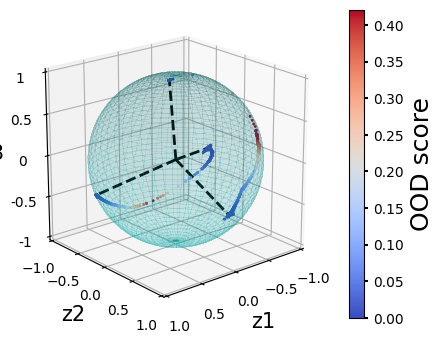

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 1
system = "E198K"
num_states=4
trial = 10

file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy',allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')
ood_scores = np.load(f'{file_path}/ood_scores.npy',allow_pickle=True)

# print(features.shape)
# print(state_centers)
# print(state_centers.shape)

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# Compute pairwise anglular distances between metastable state centers
sim_mat = np.arccos(state_centers.dot(state_centers.T))
np.fill_diagonal(sim_mat,val=np.pi)
# Theoretical threshold (based on minimum angle between state centers)
thres = -np.cos(sim_mat.min()/2)+1

plt.rcParams['figure.figsize'] = (6,4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
   x, y, z,  rstride=2, cstride=2, color='c', alpha=0.1, linewidth=100,antialiased=False)

ax.plot([0,state_centers[0,0]],[0,state_centers[0,1]],[0,state_centers[0,2]],linewidth=2,color='black',linestyle='--')
ax.plot([0,state_centers[1,0]],[0,state_centers[1,1]],[0,state_centers[1,2]],linewidth=2,color='black',linestyle='--')
ax.plot([0,state_centers[2,0]],[0,state_centers[2,1]],[0,state_centers[2,2]],linewidth=2,color='black',linestyle='--')
ax.plot([0,state_centers[3,0]],[0,state_centers[3,1]],[0,state_centers[3,2]],linewidth=2,color='black',linestyle='--')

cb = ax.scatter(np.concatenate(features)[:,0],np.concatenate(features)[:,1],np.concatenate(features)[:,2],c=np.concatenate(ood_scores)[:],s=1,alpha=1,cmap='coolwarm')
cb.set_clim(0.0,thres)

ccc = fig.colorbar(cb)
ccc.ax.tick_params(labelsize=10,length=3,width=1.5)
ccc.set_label('OOD score',fontsize=18)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1])
ax.set_aspect("equal")
ax.tick_params(axis="both",labelsize=10,direction='out',length=7.5,width=2.5)

ax.set_xlabel('z1',fontsize=15)
ax.set_ylabel('z2',fontsize=15)
ax.set_zlabel('z3',fontsize=15)

ax.view_init(elev=20, azim=50)

plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system}.png', dpi=900, bbox_inches='tight')

## Attempt 2

In [2]:
# N_states	4
# Number of Trials	10
# Num Feature Input	1000
# Feature Input	Select features filtered by spectral oASIS
# Learning Rate	1.00E-03
# Mode	regularize
# Beta	0.01
# Feat_dim	3
# Pretrain	10
# N_epochs	10
# Lagtime	10

### VAMP-2 Loss

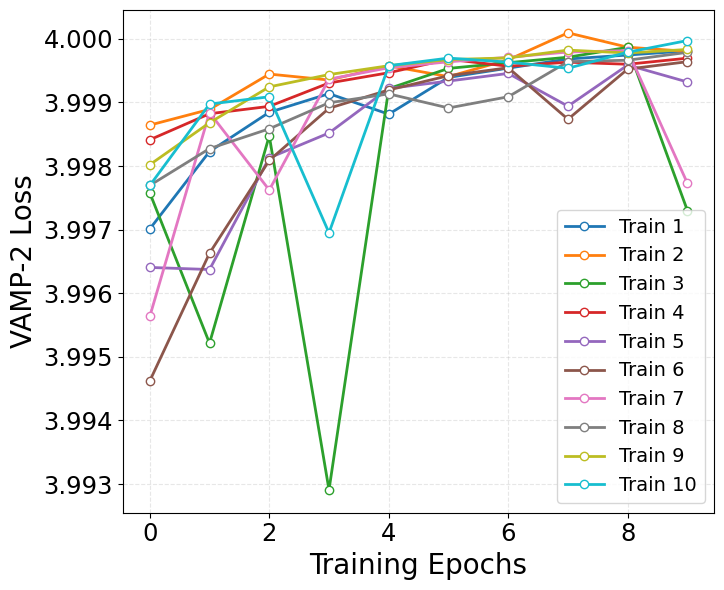

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 2
system = "E198K"
num_states=4

val_vamp = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_vamp.npy'
    dip = np.load(file_path)
    val_vamp.append(dip)

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'

# Plot with custom colors, line width, and markers
fig = plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_vamp):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels 
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('VAMP-2 Loss', fontsize=20)

#plt.yticks(np.arange(1.95, 2.011, 0.01))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=14, markerscale=1, ncol=1)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_VAMP_{system}.png', dpi=900, bbox_inches='tight')


### Dispersion Loss

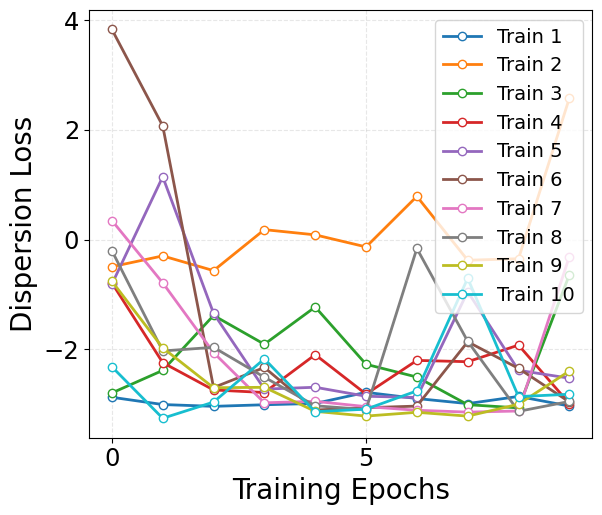

In [5]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'
#marker_edge = 'royalblue'

attempt = 2
system = "E198K"
num_states=4

val_dip = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_dis.npy'
    dip = np.load(file_path)
    val_dip.append(dip)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_dip):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('Dispersion Loss', fontsize=20)
#plt.ylim(0, 2.25)
#plt.yticks(np.arange(0, 2.1, 0.5))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)
plt.legend(loc='upper right', fontsize=14, markerscale=1, ncol=1)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_DISP_{system}.png', dpi=900, bbox_inches='tight')

### Plotting Hypersphere

/tmp/ipykernel_2357284/3377044043.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_2357284/3377044043.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_2357284/3377044043.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_2357284/3377044043.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_2357284/3377044043.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


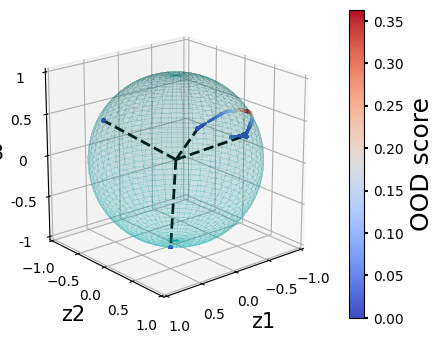

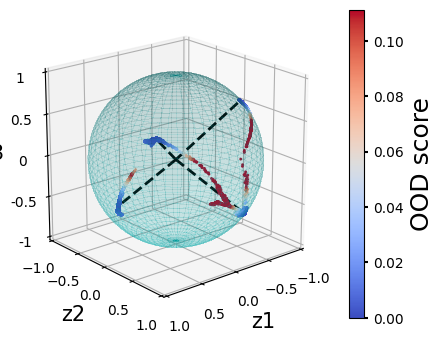

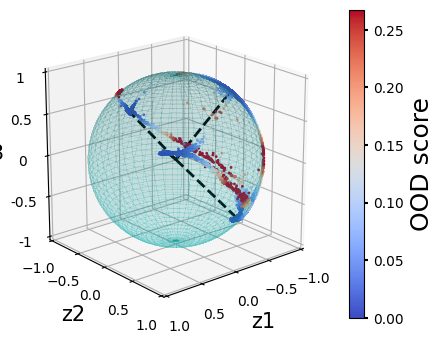

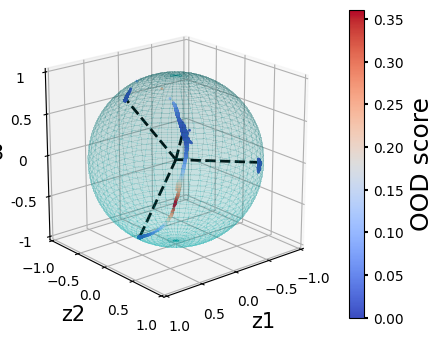

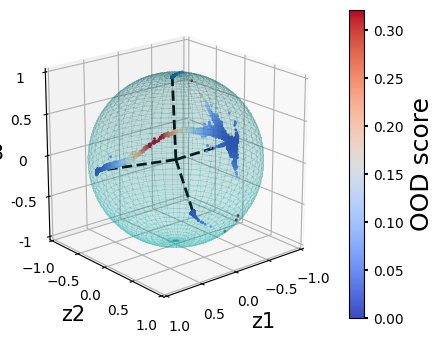

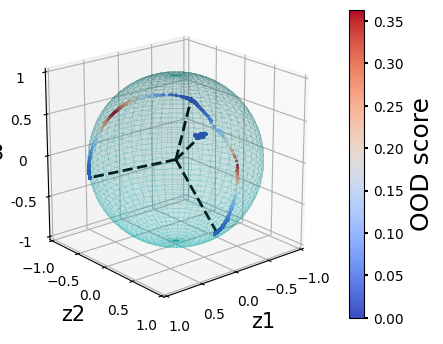

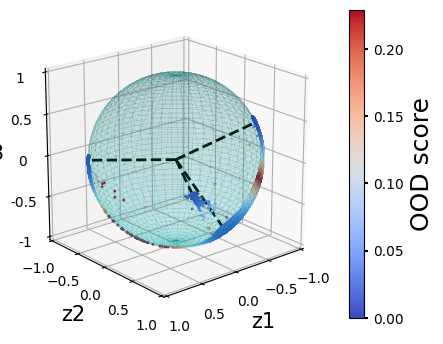

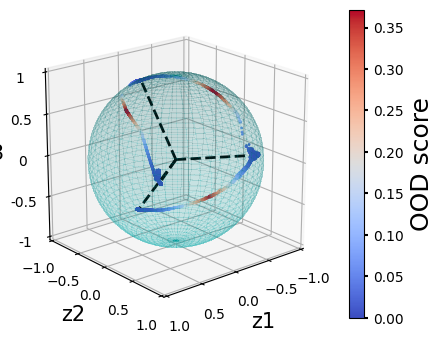

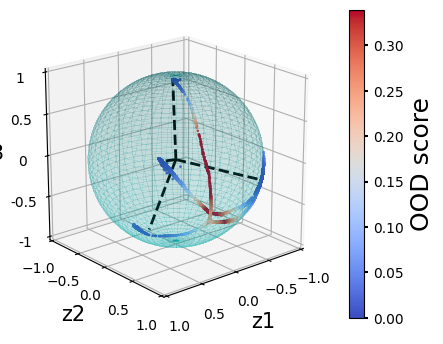

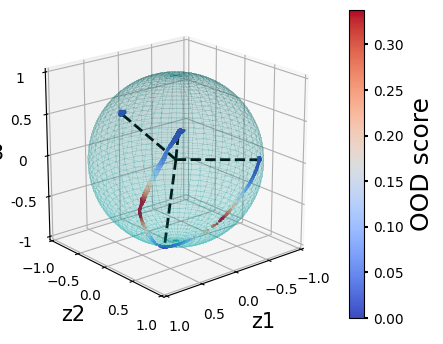

In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 2
system = "E198K"
num_states = 4
num_trials = 10 

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

for trial in range(1, num_trials+1):
    file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

    features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
    state_centers = np.load(f'{file_path}/state_centers.npy')
    ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

    # Compute pairwise angular distances between metastable state centers
    sim_mat = np.arccos(state_centers.dot(state_centers.T))
    np.fill_diagonal(sim_mat, val=np.pi)
    # Theoretical threshold (based on minimum angle between state centers)
    thres = -np.cos(sim_mat.min()/2) + 1

    plt.rcParams['figure.figsize'] = (6,4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
        linewidth=100, antialiased=False
    )

    for i in range(num_states):
        ax.plot([0, state_centers[i,0]],
                [0, state_centers[i,1]],
                [0, state_centers[i,2]],
                linewidth=2, color='black', linestyle='--')

    cb = ax.scatter(np.concatenate(features)[:,0],
                    np.concatenate(features)[:,1],
                    np.concatenate(features)[:,2],
                    c=np.concatenate(ood_scores)[:],
                    s=1, alpha=1, cmap='coolwarm')
    cb.set_clim(0.0, thres)

    ccc = fig.colorbar(cb)
    ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
    ccc.set_label('OOD score', fontsize=18)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
    ax.set_aspect("equal")
    ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

    ax.set_xlabel('z1', fontsize=15)
    ax.set_ylabel('z2', fontsize=15)
    ax.set_zlabel('z3', fontsize=15)

    ax.view_init(elev=20, azim=50)

    plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system}.png',
                dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

## Check State Assignments between TS-DAR Seeds

[1 1 1 ... 1 1 1]
[2 2 2 ... 1 1 1]
[[1 2]
 [1 2]
 [1 2]
 ...
 [1 1]
 [1 1]
 [1 1]]


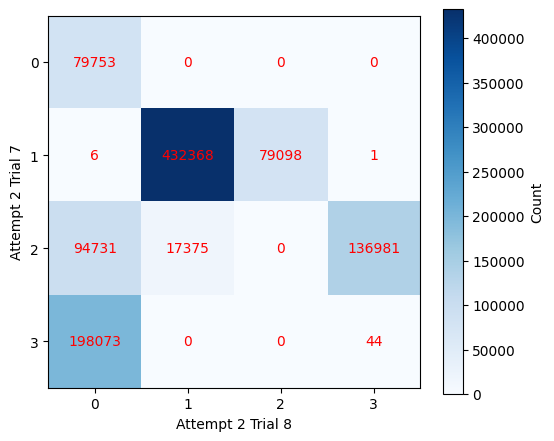

In [9]:
import os
import numpy as np
from matplotlib import pyplot as plt

system = "E198K"
num_states = 4

file_path = f'./{system}_Production/FAH_Production_Runs/'

first_attempt = 2
first_attempt_trial = 7

second_attempt = 2
second_attempt_trial = 8

first_model_path = f'{file_path}/Attempt_{first_attempt}_TSDAR_Output_{num_states}states_{system}/trial_{first_attempt_trial}/'
first_model_states = np.load(f'{first_model_path}/metastable_states.npy',allow_pickle=True)
first_model_states = np.concatenate(first_model_states)
print(first_model_states)

second_model_path = f'{file_path}/Attempt_{second_attempt}_TSDAR_Output_{num_states}states_{system}/trial_{second_attempt_trial}/'
second_model_states =  np.load(f'{second_model_path}/metastable_states.npy',allow_pickle=True)
second_model_states = np.concatenate(second_model_states)
print(second_model_states)

combined_state_sets = np.stack((first_model_states,second_model_states),axis=-1)
print(combined_state_sets)

# Created txt file to double check counts with "grep" command in bash
np.savetxt("state_assignments.txt",combined_state_sets,fmt='%d')

# Initialize a 4x4 matrix for counts
counts = np.zeros((4, 4), dtype=int)

# Count occurrences
for x, y in combined_state_sets:
    counts[x, y] += 1

# Plot heatmap
plt.figure(figsize=(6,5))
im = plt.imshow(counts, cmap="Blues")

# Add colorbar
plt.colorbar(im, label="Count")

# Tick labels
plt.xticks(range(4), [0, 1, 2, 3])
plt.yticks(range(4), [0, 1, 2, 3])
# Note imshow switches the axis to be like a matrix 
plt.ylabel(f'Attempt {first_attempt} Trial {first_attempt_trial}')
plt.xlabel(f'Attempt {second_attempt} Trial {second_attempt_trial}')

# Annotate counts on heatmap
for i in range(4):
    for j in range(4):
        plt.text(j, i, counts[i, j], ha="center", va="center", color="red")

plt.savefig(f'check_state_assignments_TS_DAR_models.png', bbox_inches='tight', dpi=300)



## Attempt 3

In [1]:
# N_states	4
# Number of Trials	10
# Num Feature Input	1000
# Feature Input	Select features filtered by spectral oASIS
# Learning Rate	1.00E-03
# Mode	regularize
# Beta	0.01
# Feat_dim	3
# Pretrain	10
# N_epochs	20
# Lagtime	10

### VAMP-2 Loss

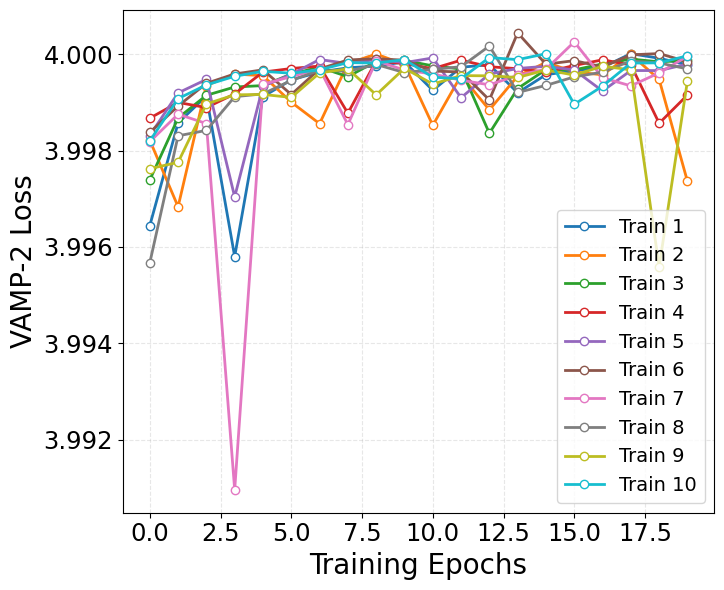

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 3
system = "E198K"
num_states=4

val_vamp = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_vamp.npy'
    dip = np.load(file_path)
    val_vamp.append(dip)

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'

# Plot with custom colors, line width, and markers
fig = plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_vamp):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels 
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('VAMP-2 Loss', fontsize=20)

#plt.yticks(np.arange(1.95, 2.011, 0.01))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=14, markerscale=1, ncol=1)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_VAMP_{system}.png', dpi=900, bbox_inches='tight')


### Dispersion Loss

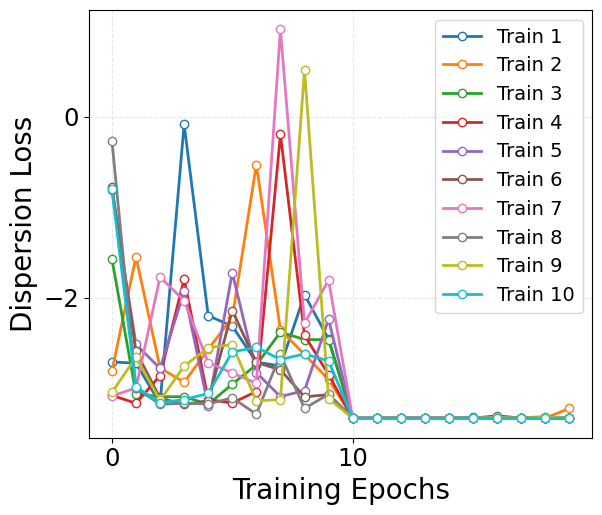

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'
#marker_edge = 'royalblue'

attempt = 3
system = "E198K"
num_states=4

val_dip = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_dis.npy'
    dip = np.load(file_path)
    val_dip.append(dip)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_dip):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('Dispersion Loss', fontsize=20)
#plt.ylim(0, 2.25)
#plt.yticks(np.arange(0, 2.1, 0.5))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)
plt.legend(loc='upper right', fontsize=14, markerscale=1, ncol=1)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_DISP_{system}.png', dpi=900, bbox_inches='tight')

### Plotting Hypersphere

/tmp/ipykernel_285011/3016009121.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_285011/3016009121.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_285011/3016009121.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_285011/3016009121.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_285011/3016009121.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


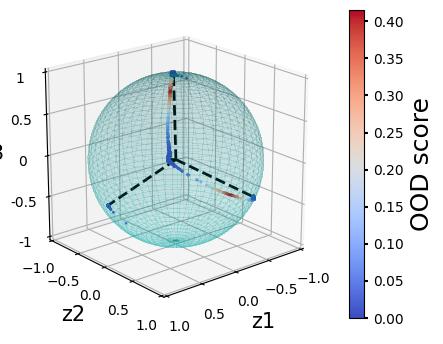

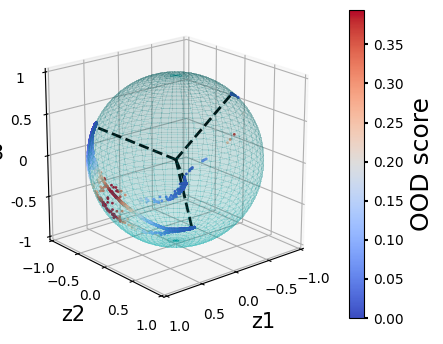

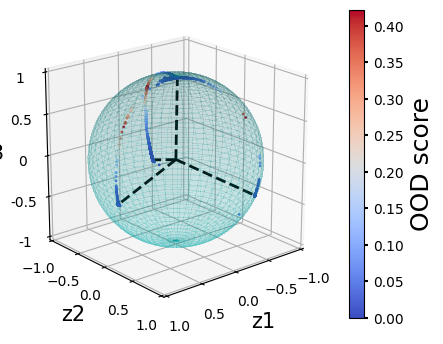

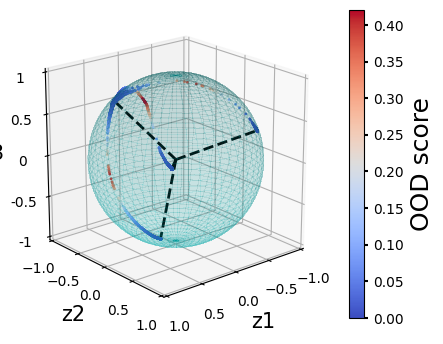

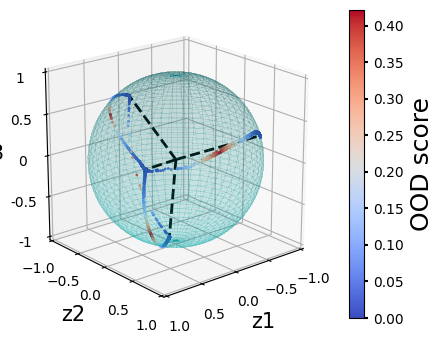

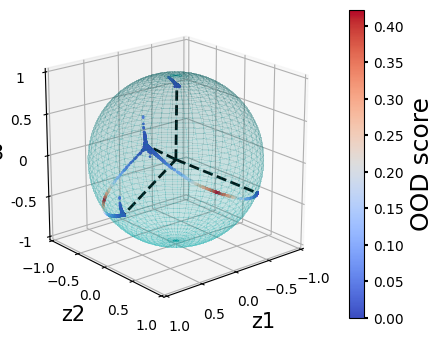

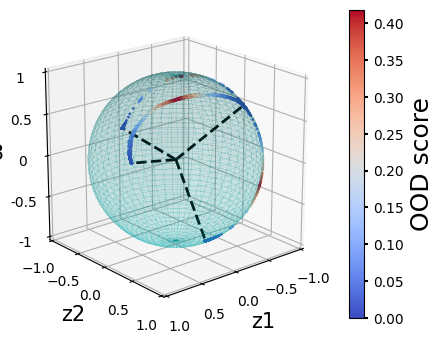

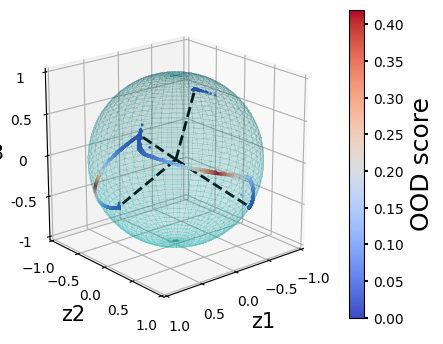

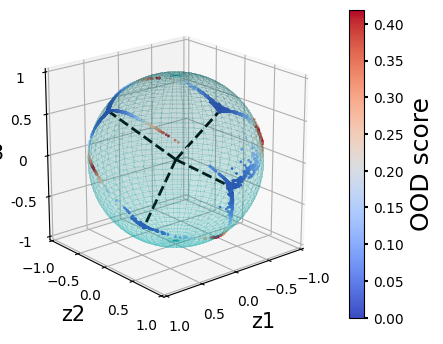

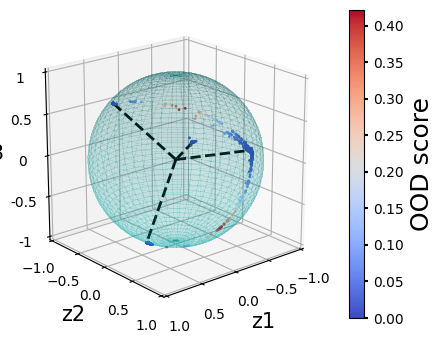

In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 3
system = "E198K"
num_states = 4
num_trials = 10 

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

for trial in range(1, num_trials+1):
    file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

    features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
    state_centers = np.load(f'{file_path}/state_centers.npy')
    ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

    # Compute pairwise angular distances between metastable state centers
    sim_mat = np.arccos(state_centers.dot(state_centers.T))
    np.fill_diagonal(sim_mat, val=np.pi)
    # Theoretical threshold (based on minimum angle between state centers)
    thres = -np.cos(sim_mat.min()/2) + 1

    plt.rcParams['figure.figsize'] = (6,4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
        linewidth=100, antialiased=False
    )

    for i in range(num_states):
        ax.plot([0, state_centers[i,0]],
                [0, state_centers[i,1]],
                [0, state_centers[i,2]],
                linewidth=2, color='black', linestyle='--')

    cb = ax.scatter(np.concatenate(features)[:,0],
                    np.concatenate(features)[:,1],
                    np.concatenate(features)[:,2],
                    c=np.concatenate(ood_scores)[:],
                    s=1, alpha=1, cmap='coolwarm')
    cb.set_clim(0.0, thres)

    ccc = fig.colorbar(cb)
    ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
    ccc.set_label('OOD score', fontsize=18)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
    ax.set_aspect("equal")
    ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

    ax.set_xlabel('z1', fontsize=15)
    ax.set_ylabel('z2', fontsize=15)
    ax.set_zlabel('z3', fontsize=15)

    ax.view_init(elev=20, azim=50)

    plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system}.png',
                dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

### Plotting Hypersphere with State Colors

/tmp/ipykernel_1968330/3083887844.py:29: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1968330/3083887844.py:29: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1968330/3083887844.py:29: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1968330/3083887844.py:29: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1968330/3083887844.py:29: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


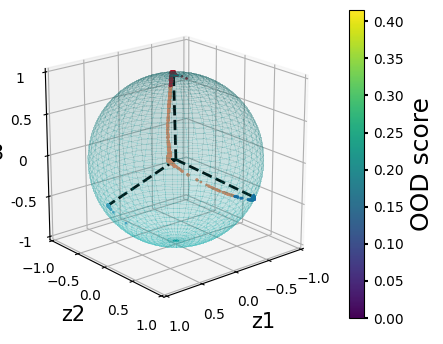

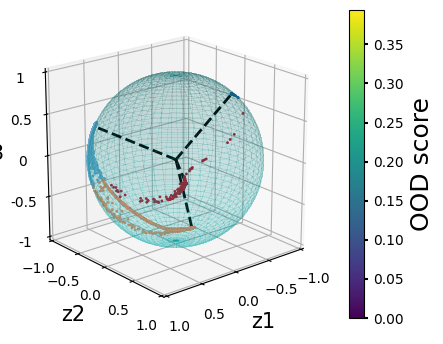

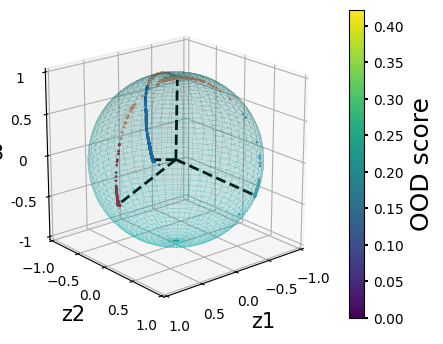

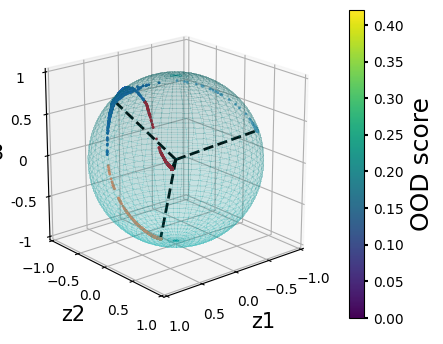

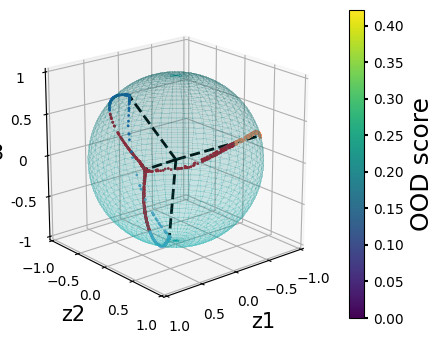

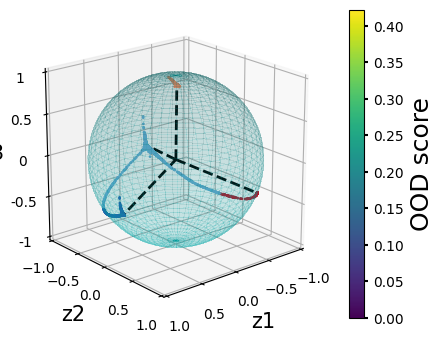

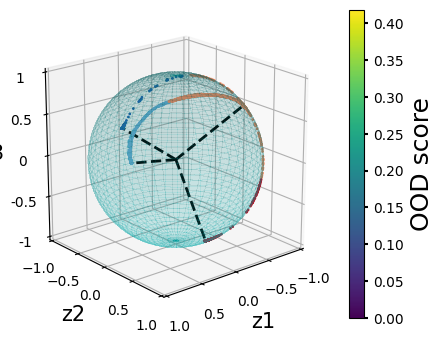

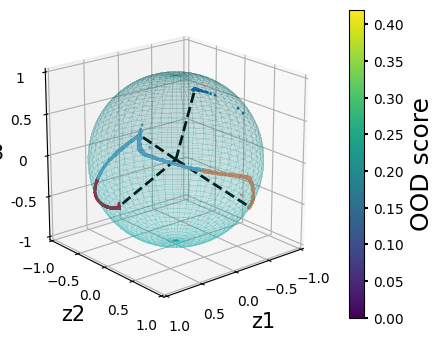

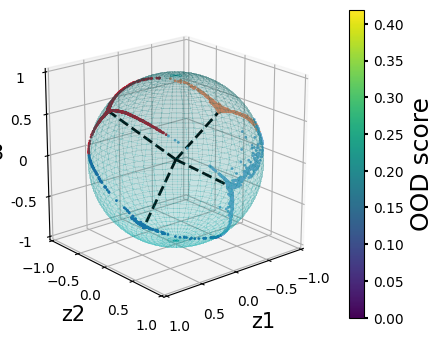

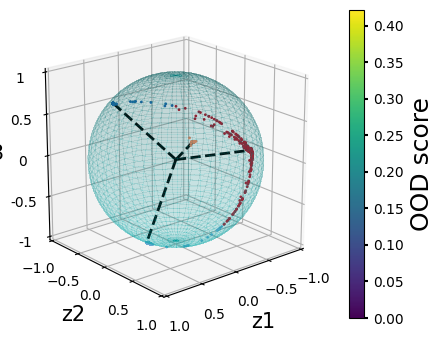

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 3
system = "E198K"
num_states = 4
num_trials = 10 

colors = np.array(['#ef8a62', '#67a9cf', '#2166ac','#b2182b', 'g', 'purple', 'grey', 'yellow', 'white'])

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

for trial in range(1, num_trials+1):
    file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

    features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
    state_centers = np.load(f'{file_path}/state_centers.npy')
    model_states = np.load(f'{file_path}/metastable_states.npy', allow_pickle=True)

    # Compute pairwise angular distances between metastable state centers
    sim_mat = np.arccos(state_centers.dot(state_centers.T))
    np.fill_diagonal(sim_mat, val=np.pi)
    # Theoretical threshold (based on minimum angle between state centers)
    thres = -np.cos(sim_mat.min()/2) + 1

    plt.rcParams['figure.figsize'] = (6,4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
        linewidth=100, antialiased=False
    )

    for i in range(num_states):
        ax.plot([0, state_centers[i,0]],
                [0, state_centers[i,1]],
                [0, state_centers[i,2]],
                linewidth=2, color='black', linestyle='--')

    cb = ax.scatter(np.concatenate(features)[:,0],
                    np.concatenate(features)[:,1],
                    np.concatenate(features)[:,2],
                    color=colors[np.concatenate(model_states)],
                    s=1, alpha=1)
    cb.set_clim(0.0, thres)

    ccc = fig.colorbar(cb)
    ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
    ccc.set_label('OOD score', fontsize=18)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
    ax.set_aspect("equal")
    ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

    ax.set_xlabel('z1', fontsize=15)
    ax.set_ylabel('z2', fontsize=15)
    ax.set_zlabel('z3', fontsize=15)

    ax.view_init(elev=20, azim=50)

    plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_state_color_hypersphere_plot_{system}.png',
                dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

### Getting State Centers

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

system = "E198K"

attempt = 3
trial = 7
num_states = 4

file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')

#print(features[5].shape)
#print(state_centers)


# Combine all trajectories into one array
all_features = np.vstack(features)  # shape (total_points, n_features)
print(all_features.shape)

# Compute pairwise distances
distances = np.linalg.norm(all_features[None, :, :] - state_centers[:, None, :], axis=2)

print(distances.shape)

# Index of closest feature for each center
closest_indices = np.argmin(distances, axis=1)

#print(closest_indices.shape)
print(closest_indices)

# Get closest points
closest_points = all_features[closest_indices]

# Build lookup of (trajectory_index, frame_index)
index_lookup = []
for traj_idx, traj in enumerate(features):
    for frame_idx in range(traj.shape[0]):
        index_lookup.append((traj_idx, frame_idx))

closest_traj_frame = [index_lookup[i] for i in closest_indices]

#print(closest_traj_frame)
#print(closest_traj_frame[0][1])


# Order of files loaded into TS-DAR
run_clone_file=f'Attempt_3_TS_run_clone_list_{system}.txt'

# File Lists
E198K_file_list = []
with open(run_clone_file, 'r') as run_clone_list:
    for run_clone in run_clone_list:
        # Remove new line character
        run_clone=run_clone.rstrip('\n')
        E198K_file_list.append(run_clone)

for traj, frame in closest_traj_frame:
    print(f"Traj number is: {traj}")
    print(E198K_file_list[traj])
    print(f"Frame number is: {frame}\n")



(1038430, 3)
(4, 1038430)
[283018 670017 911566 219163]
Traj number is: 237
RUN48_CLONE3
Frame number is: 1655

Traj number is: 552
RUN112_CLONE4
Frame number is: 282

Traj number is: 755
RUN154_CLONE4
Frame number is: 265

Traj number is: 188
RUN38_CLONE4
Frame number is: 625



### Getting Transition State Centers

In [41]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

system = "E198K"

attempt = 3
trial = 7
num_states = 4

file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')
ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)
ood_scores = np.concatenate(ood_scores)

#print(state_centers)

# for vector in state_centers:
#     norm = np.linalg.norm(vector)
#     print(norm)

transitions = np.array([[0,1], [0,2], [0,3]])
#print(transitions.shape[0])

transition_state_vectors = []
for trans in transitions:
    first = trans[0]
    second = trans[1]
    #print(f"Transition from State {first} to {second}") 
    mean_vector = (state_centers[first] + state_centers[second])/2
    #mean_vector = mean_vector/np.linalg.norm(mean_vector)
    #print(mean_vector)
    transition_state_vectors.append(mean_vector)

transition_state_vectors=np.array(transition_state_vectors)
#print(transition_state_vectors.shape)

# Combine all trajectories into one array
all_features = np.vstack(features)  # shape (total_points, n_features)
#print(all_features.shape)

# Compute pairwise distances
distances = np.linalg.norm(all_features[None, :, :] - transition_state_vectors[:, None, :], axis=2)

#print(distances.shape)

# Index of closest feature for each center
closest_indices = np.argmin(distances, axis=1)

#print(closest_indices.shape)
#print(closest_indices)

# Get closest points
closest_points = all_features[closest_indices]
center_ood_scores = ood_scores[closest_indices]
print(center_ood_scores)
print(np.max(ood_scores))

# Build lookup of (trajectory_index, frame_index)
index_lookup = []
for traj_idx, traj in enumerate(features):
    for frame_idx in range(traj.shape[0]):
        index_lookup.append((traj_idx, frame_idx))

closest_traj_frame = [index_lookup[i] for i in closest_indices]

#print(closest_traj_frame)
#print(closest_traj_frame[0][1])


# Order of files loaded into TS-DAR
run_clone_file=f'Attempt_3_TS_run_clone_list_{system}.txt'

# File Lists
E198K_file_list = []
with open(run_clone_file, 'r') as run_clone_list:
    for run_clone in run_clone_list:
        # Remove new line character
        run_clone=run_clone.rstrip('\n')
        E198K_file_list.append(run_clone)

for index, (traj, frame) in enumerate(closest_traj_frame):
    first = transitions[index][0]
    second = transitions[index][1]
    print(f"Transition from State {first} to {second}")
    print(f"Traj number is: {traj}")
    print(E198K_file_list[traj])
    print(f"Frame number is: {frame}\n")

[0.37981772 0.4303857  0.41322356]
0.44792897
Transition from State 0 to 1
Traj number is: 142
RUN29_CLONE2
Frame number is: 366

Transition from State 0 to 2
Traj number is: 210
RUN43_CLONE1
Frame number is: 371

Transition from State 0 to 3
Traj number is: 43
RUN9_CLONE0
Frame number is: 157



### Plotting Transition State Centers

/tmp/ipykernel_1976316/1954414383.py:43: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


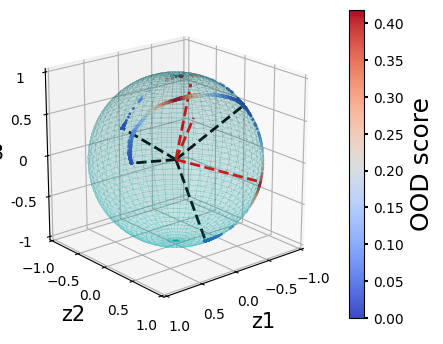

In [28]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

system = "E198K"

attempt = 3
trial = 7
num_states = 4

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')
ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

transitions = np.array([[0,1], [0,2], [0,3]])

transition_state_vectors = []
for trans in transitions:
    first = trans[0]
    second = trans[1]
    #print(f"Transition from State {first} to {second}") 
    mean_vector = (state_centers[first] + state_centers[second])/2
    mean_vector = mean_vector/np.linalg.norm(mean_vector)
    #print(unit_vector)
    transition_state_vectors.append(mean_vector)

transition_state_vectors=np.array(transition_state_vectors)

# Compute pairwise angular distances between metastable state centers
sim_mat = np.arccos(state_centers.dot(state_centers.T))
np.fill_diagonal(sim_mat, val=np.pi)
# Theoretical threshold (based on minimum angle between state centers)
thres = -np.cos(sim_mat.min()/2) + 1

plt.rcParams['figure.figsize'] = (6,4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
    linewidth=100, antialiased=False
)

for i in range(num_states):
    ax.plot([0, state_centers[i,0]],
            [0, state_centers[i,1]],
            [0, state_centers[i,2]],
            linewidth=2, color='black', linestyle='--')

for i in range(transitions.shape[0]):
    ax.plot([0, transition_state_vectors[i,0]],
            [0, transition_state_vectors[i,1]],
            [0, transition_state_vectors[i,2]],
            linewidth=2, color='red', linestyle='--')

cb = ax.scatter(np.concatenate(features)[:,0],
                np.concatenate(features)[:,1],
                np.concatenate(features)[:,2],
                c=np.concatenate(ood_scores)[:],
                s=1, alpha=1, cmap='coolwarm')
cb.set_clim(0.0, thres)

ccc = fig.colorbar(cb)
ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
ccc.set_label('OOD score', fontsize=18)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
ax.set_aspect("equal")
ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

ax.set_xlabel('z1', fontsize=15)
ax.set_ylabel('z2', fontsize=15)
ax.set_zlabel('z3', fontsize=15)

ax.view_init(elev=20, azim=50)

## Attempt 4

In [ ]:
# N_states	4
# Number of Trials	10
# Num Feature Input	1000
# Feature Input	Select features filtered by spectral oASIS
# Learning Rate	1.00E-03
# Mode	regularize
# Beta	0.01
# Feat_dim	3
# Pretrain	10
# N_epochs	20
# Lagtime	50

### VAMP-2 Loss

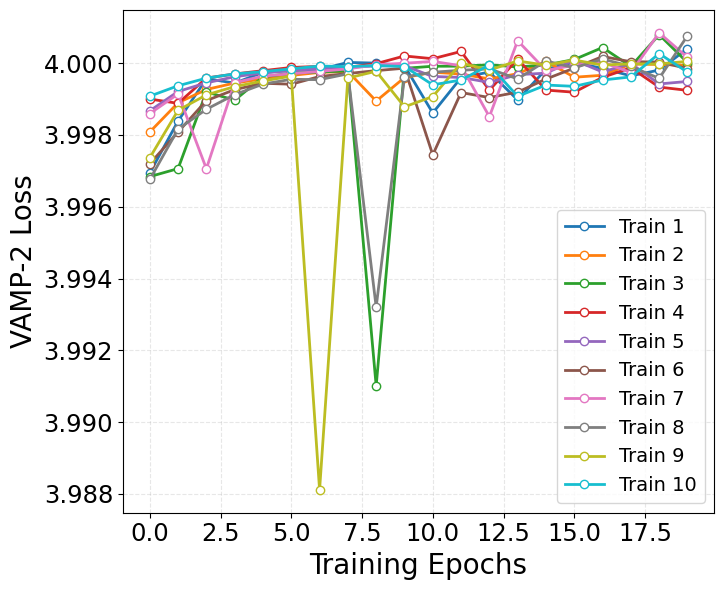

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 4
system = "E198K"
num_states=4

val_vamp = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_vamp.npy'
    dip = np.load(file_path)
    val_vamp.append(dip)

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'

# Plot with custom colors, line width, and markers
fig = plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_vamp):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels 
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('VAMP-2 Loss', fontsize=20)

#plt.yticks(np.arange(1.95, 2.011, 0.01))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=14, markerscale=1, ncol=1)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_VAMP_{system}.png', dpi=900, bbox_inches='tight')


### Dispersion Loss

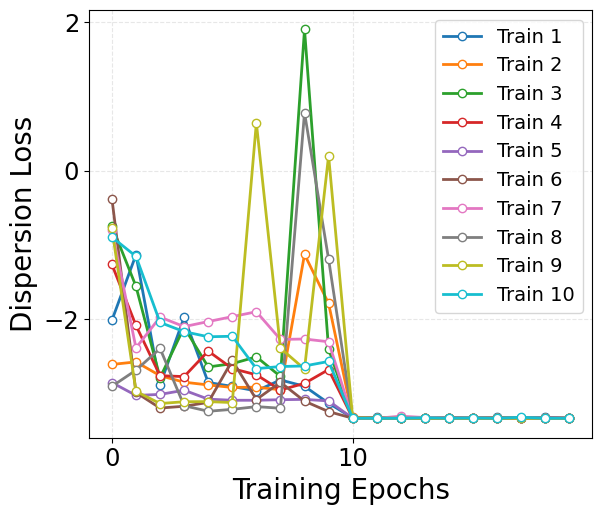

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'
#marker_edge = 'royalblue'

attempt = 4
system = "E198K"
num_states=4

val_dip = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_dis.npy'
    dip = np.load(file_path)
    val_dip.append(dip)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_dip):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('Dispersion Loss', fontsize=20)
#plt.ylim(0, 2.25)
#plt.yticks(np.arange(0, 2.1, 0.5))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)
plt.legend(loc='upper right', fontsize=14, markerscale=1, ncol=1)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_DISP_{system}.png', dpi=900, bbox_inches='tight')

### Plotting Hypersphere

/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1665107/2429101842.py:27: RuntimeWarning: invalid value encountered in arccos
 

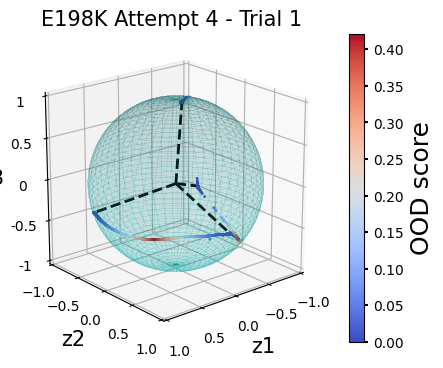

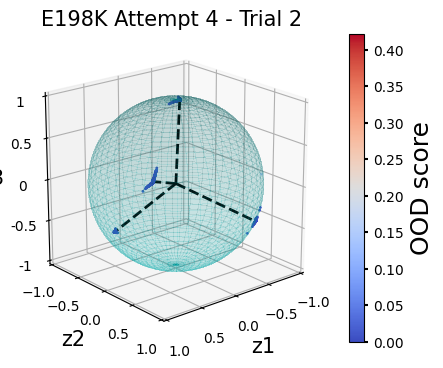

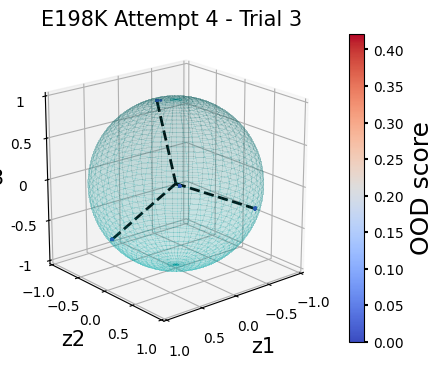

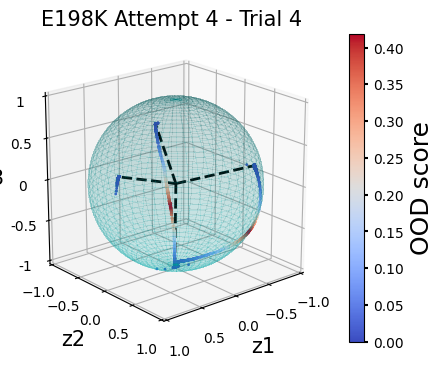

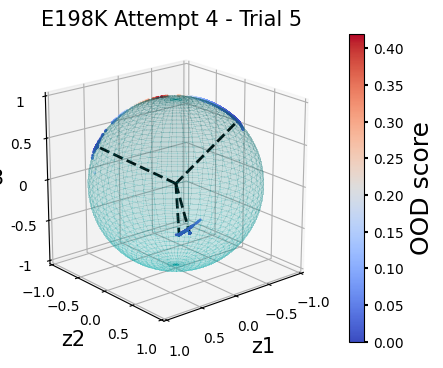

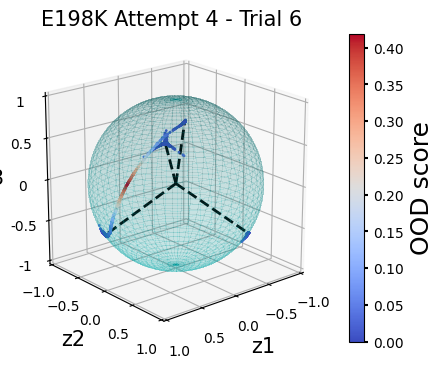

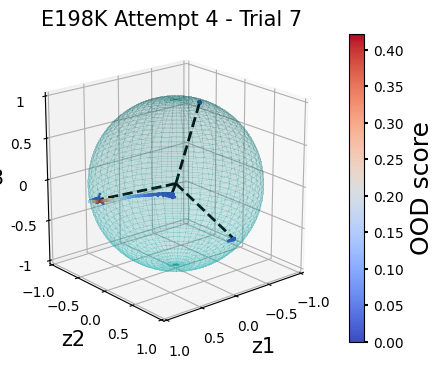

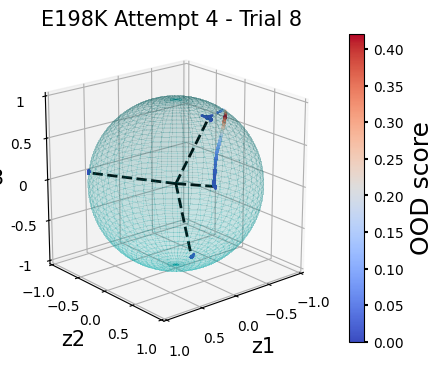

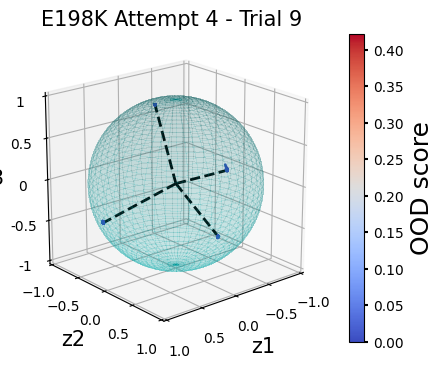

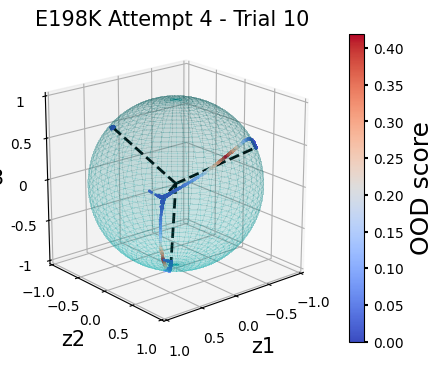

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 4
system = "E198K"
num_states = 4
num_trials = 10 

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

for trial in range(1, num_trials+1):
    file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

    features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
    state_centers = np.load(f'{file_path}/state_centers.npy')
    ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

    # Compute pairwise angular distances between metastable state centers
    sim_mat = np.arccos(state_centers.dot(state_centers.T))
    np.fill_diagonal(sim_mat, val=np.pi)
    # Theoretical threshold (based on minimum angle between state centers)
    thres = -np.cos(sim_mat.min()/2) + 1

    plt.rcParams['figure.figsize'] = (6,4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
        linewidth=100, antialiased=False
    )

    for i in range(num_states):
        ax.plot([0, state_centers[i,0]],
                [0, state_centers[i,1]],
                [0, state_centers[i,2]],
                linewidth=2, color='black', linestyle='--')

    cb = ax.scatter(np.concatenate(features)[:,0],
                    np.concatenate(features)[:,1],
                    np.concatenate(features)[:,2],
                    c=np.concatenate(ood_scores)[:],
                    s=1, alpha=1, cmap='coolwarm')
    cb.set_clim(0.0, thres)

    ccc = fig.colorbar(cb)
    ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
    ccc.set_label('OOD score', fontsize=18)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
    ax.set_aspect("equal")
    ax.set_title(f"{system} Attempt {attempt} - Trial {trial}",fontsize=15)
    ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

    ax.set_xlabel('z1', fontsize=15)
    ax.set_ylabel('z2', fontsize=15)
    ax.set_zlabel('z3', fontsize=15)

    ax.view_init(elev=20, azim=50)

    plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system}.png',
                dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

### Getting State Centers

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

system = "E198K"

attempt = 4
trial = 10
num_states = 4

file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')

#print(features[5].shape)
#print(state_centers)


# Combine all trajectories into one array
all_features = np.vstack(features)  # shape (total_points, n_features)
print(all_features.shape)

# Compute pairwise distances
distances = np.linalg.norm(all_features[None, :, :] - state_centers[:, None, :], axis=2)

print(distances.shape)

# Index of closest feature for each center
closest_indices = np.argmin(distances, axis=1)

#print(closest_indices.shape)
print(closest_indices)

# Get closest points
closest_points = all_features[closest_indices]

# Build lookup of (trajectory_index, frame_index)
index_lookup = []
for traj_idx, traj in enumerate(features):
    for frame_idx in range(traj.shape[0]):
        index_lookup.append((traj_idx, frame_idx))

closest_traj_frame = [index_lookup[i] for i in closest_indices]

#print(closest_traj_frame)
#print(closest_traj_frame[0][1])


# Order of files loaded into TS-DAR
run_clone_file=f'Attempt_{attempt}_TS_run_clone_list_{system}.txt'

# File Lists
E198K_file_list = []
with open(run_clone_file, 'r') as run_clone_list:
    for run_clone in run_clone_list:
        # Remove new line character
        run_clone=run_clone.rstrip('\n')
        E198K_file_list.append(run_clone)

for traj, frame in closest_traj_frame:
    print(f"Traj number is: {traj}")
    print(E198K_file_list[traj])
    print(f"Frame number is: {frame}\n")



(1038430, 3)
(4, 1038430)
[ 138793 1010490  608864  423741]
Traj number is: 119
RUN24_CLONE3
Frame number is: 530

Traj number is: 833
RUN170_CLONE3
Frame number is: 165

Traj number is: 501
RUN102_CLONE2
Frame number is: 249

Traj number is: 352
RUN71_CLONE4
Frame number is: 592



# WT FAH Data

## Attempt 1

In [ ]:
# N_states	4
# Number of Trials	10
# Num Feature Input	1000
# Feature Input	Select features filtered by spectral oASIS
# Learning Rate	1.00E-03
# Mode	regularize
# Beta	0.01
# Feat_dim	3
# Pretrain	10
# N_epochs	20
# Lagtime	10

#Same as Attempt 3 for E198K

### VAMP-2 Loss

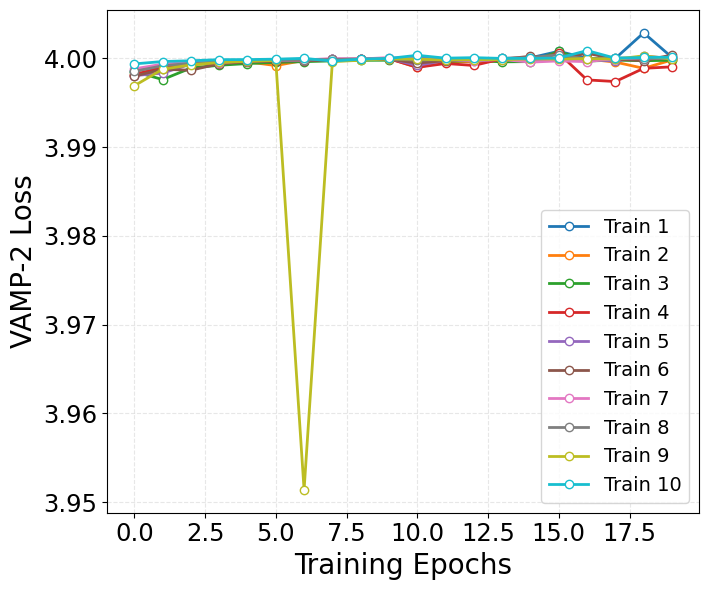

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 1
system = "WT"
num_states=4

val_vamp = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_vamp.npy'
    dip = np.load(file_path)
    val_vamp.append(dip)

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'

# Plot with custom colors, line width, and markers
fig = plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_vamp):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels 
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('VAMP-2 Loss', fontsize=20)

#plt.yticks(np.arange(1.95, 2.011, 0.01))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=14, markerscale=1, ncol=1)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_VAMP_{system}.png', dpi=900, bbox_inches='tight')


### Dispersion Loss

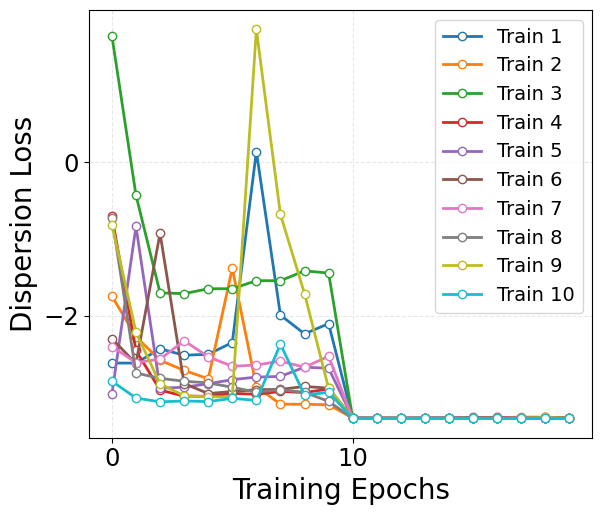

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

# Define custom colors for the line and markers
line_color = 'royalblue'
marker_face = 'white'
#marker_edge = 'royalblue'

attempt = 1
system = "WT"
num_states=4

val_dip = []
for i in range(1,11):
    file_path=f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{i}/validation_dis.npy'
    dip = np.load(file_path)
    val_dip.append(dip)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(8, 6))
for idx, dip in enumerate(val_dip):
    plt.plot(dip, linewidth=2, marker='o', markersize=6, markerfacecolor=marker_face, linestyle='-', label=f'Train {idx + 1}')

# Set the axis labels
plt.xlabel('Training Epochs', fontsize=20)
plt.ylabel('Dispersion Loss', fontsize=20)
#plt.ylim(0, 2.25)
#plt.yticks(np.arange(0, 2.1, 0.5))
#plt.xticks(np.arange(0, 61, 10))

# Customize tick parameters for readability
plt.xticks(fontsize=17.5)
plt.yticks(fontsize=17.5)
plt.gca().set_box_aspect(0.85)
plt.legend(loc='upper right', fontsize=14, markerscale=1, ncol=1)

# Add a dashed grid to improve the readability of the plot
plt.grid(alpha=0.3, linestyle='--')

# Adjust the layout to ensure everything fits well
plt.tight_layout()

plt.savefig(f'TS_DAR_attempt_{attempt}_DISP_{system}.png', dpi=900, bbox_inches='tight')

### Plotting Hypersphere

/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))
/tmp/ipykernel_1138152/401695950.py:27: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


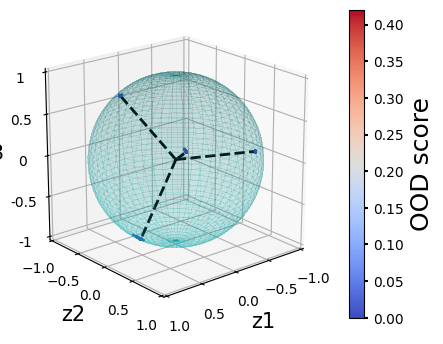

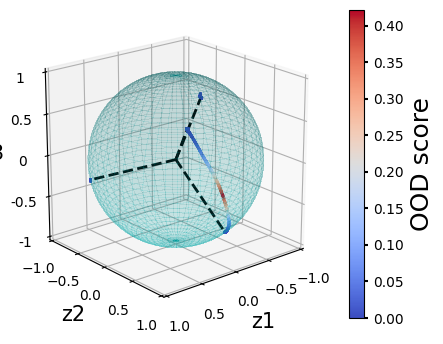

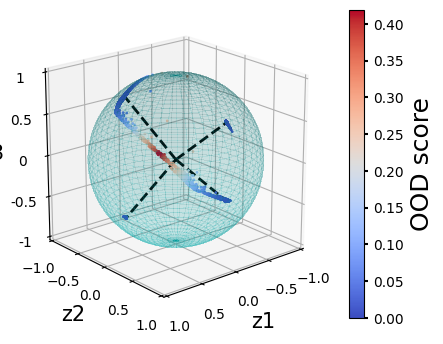

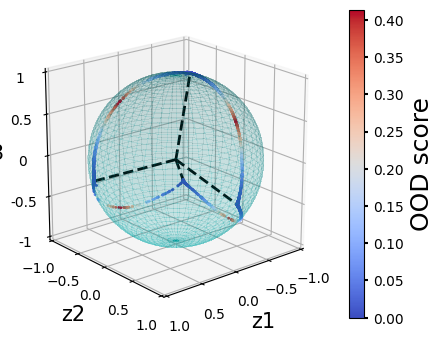

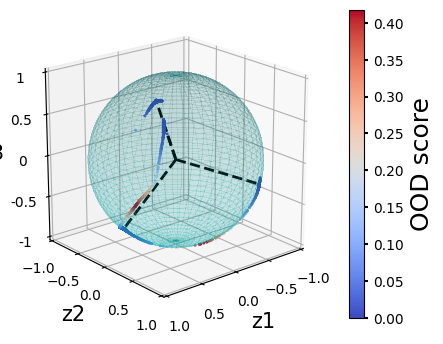

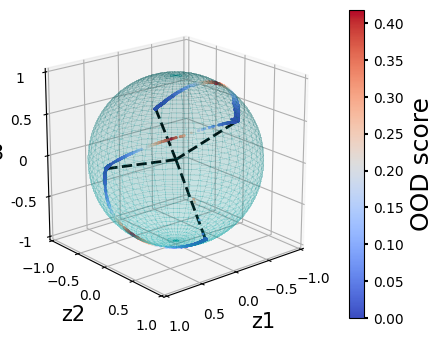

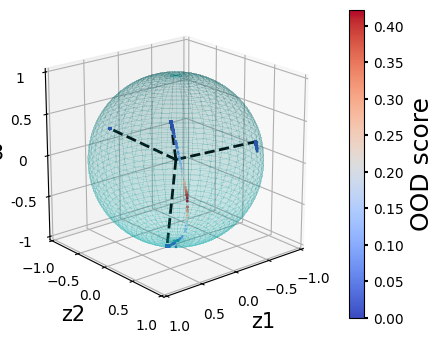

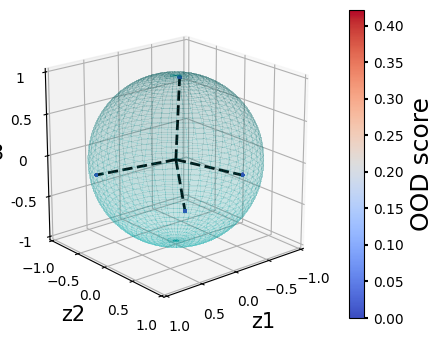

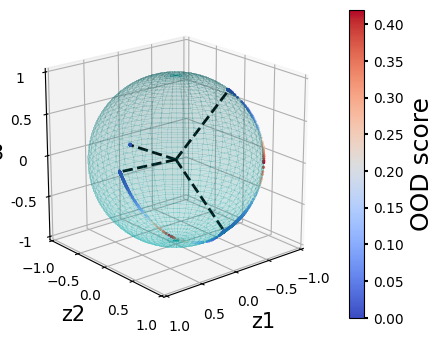

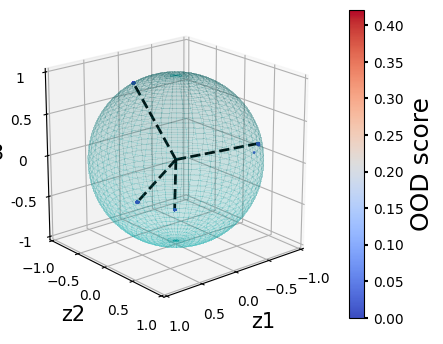

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

attempt = 1
system = "WT"
num_states = 4
num_trials = 10 

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

for trial in range(1, num_trials+1):
    file_path = f'./{system}_Production/FAH_Production_Runs/Attempt_{attempt}_TSDAR_Output_{num_states}states_{system}/trial_{trial}/'

    features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
    state_centers = np.load(f'{file_path}/state_centers.npy')
    ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

    # Compute pairwise angular distances between metastable state centers
    sim_mat = np.arccos(state_centers.dot(state_centers.T))
    np.fill_diagonal(sim_mat, val=np.pi)
    # Theoretical threshold (based on minimum angle between state centers)
    thres = -np.cos(sim_mat.min()/2) + 1

    plt.rcParams['figure.figsize'] = (6,4)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
        linewidth=100, antialiased=False
    )

    for i in range(num_states):
        ax.plot([0, state_centers[i,0]],
                [0, state_centers[i,1]],
                [0, state_centers[i,2]],
                linewidth=2, color='black', linestyle='--')

    cb = ax.scatter(np.concatenate(features)[:,0],
                    np.concatenate(features)[:,1],
                    np.concatenate(features)[:,2],
                    c=np.concatenate(ood_scores)[:],
                    s=1, alpha=1, cmap='coolwarm')
    cb.set_clim(0.0, thres)

    ccc = fig.colorbar(cb)
    ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
    ccc.set_label('OOD score', fontsize=18)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
    ax.set_aspect("equal")
    ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

    ax.set_xlabel('z1', fontsize=15)
    ax.set_ylabel('z2', fontsize=15)
    ax.set_zlabel('z3', fontsize=15)

    ax.view_init(elev=20, azim=50)

    plt.savefig(f'TS_DAR_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system}.png',
                dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

## Projected onto E198K Attempt 3

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/tmp/ipykernel_2059790/58043892.py:28: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


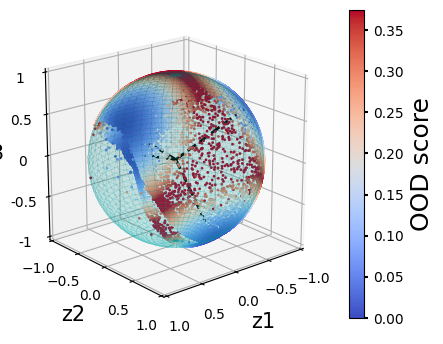

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

system_data = "WT"
system_model = "E198K"

attempt = 3
trial = 7
num_states = 4

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

file_path = f'./{system_data}_Production/FAH_Production_Runs/From_{system_model}_Attempt_{attempt}_TSDAR_Output_{num_states}states_{system_data}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')
ood_scores = np.load(f'{file_path}/ood_scores.npy', allow_pickle=True)

# Compute pairwise angular distances between metastable state centers
sim_mat = np.arccos(state_centers.dot(state_centers.T))
np.fill_diagonal(sim_mat, val=np.pi)
# Theoretical threshold (based on minimum angle between state centers)
thres = -np.cos(sim_mat.min()/2) + 1

plt.rcParams['figure.figsize'] = (6,4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
    linewidth=100, antialiased=False
)

for i in range(num_states):
    ax.plot([0, state_centers[i,0]],
            [0, state_centers[i,1]],
            [0, state_centers[i,2]],
            linewidth=2, color='black', linestyle='--')

cb = ax.scatter(np.concatenate(features)[:,0],
                np.concatenate(features)[:,1],
                np.concatenate(features)[:,2],
                c=np.concatenate(ood_scores)[:],
                s=1, alpha=1, cmap='coolwarm')
cb.set_clim(0.0, thres)

ccc = fig.colorbar(cb)
ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
ccc.set_label('OOD score', fontsize=18)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
ax.set_aspect("equal")
ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

ax.set_xlabel('z1', fontsize=15)
ax.set_ylabel('z2', fontsize=15)
ax.set_zlabel('z3', fontsize=15)

ax.view_init(elev=20, azim=50)

plt.savefig(f'TS_DAR_from_{system_model}_attempt_{attempt}_trial_{trial}_hypersphere_plot_{system_data}.png',
            dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial

### Plotting Hypersphere with State Colors

/tmp/ipykernel_97237/2365472005.py:30: RuntimeWarning: invalid value encountered in arccos
  sim_mat = np.arccos(state_centers.dot(state_centers.T))


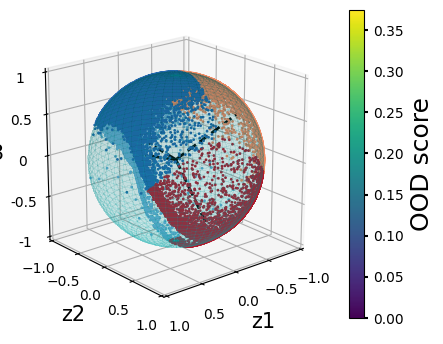

In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt

system_data = "WT"
system_model = "E198K"

attempt = 3
trial = 7
num_states = 4

colors = np.array(['#ef8a62', '#67a9cf', '#2166ac','#b2182b', 'g', 'purple', 'grey', 'yellow', 'white'])

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

file_path = f'./{system_data}_Production/FAH_Production_Runs/From_{system_model}_Attempt_{attempt}_TSDAR_Output_{num_states}states_{system_data}/trial_{trial}/'

features = np.load(f'{file_path}/hypersphere_embs.npy', allow_pickle=True)
state_centers = np.load(f'{file_path}/state_centers.npy')
model_states = np.load(f'{file_path}/metastable_states.npy', allow_pickle=True)

# Compute pairwise angular distances between metastable state centers
sim_mat = np.arccos(state_centers.dot(state_centers.T))
np.fill_diagonal(sim_mat, val=np.pi)
# Theoretical threshold (based on minimum angle between state centers)
thres = -np.cos(sim_mat.min()/2) + 1

plt.rcParams['figure.figsize'] = (6,4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z, rstride=2, cstride=2, color='c', alpha=0.1,
    linewidth=100, antialiased=False
)

for i in range(num_states):
    ax.plot([0, state_centers[i,0]],
            [0, state_centers[i,1]],
            [0, state_centers[i,2]],
            linewidth=2, color='black', linestyle='--')

cb = ax.scatter(np.concatenate(features)[:,0],
                np.concatenate(features)[:,1],
                np.concatenate(features)[:,2],
                color=colors[np.concatenate(model_states)],
                s=1, alpha=1)
cb.set_clim(0.0, thres)

ccc = fig.colorbar(cb)
ccc.ax.tick_params(labelsize=10, length=3, width=1.5)
ccc.set_label('OOD score', fontsize=18)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1], [-1,-0.5,0,0.5,1])
ax.set_aspect("equal")
ax.tick_params(axis="both", labelsize=10, direction='out', length=7.5, width=2.5)

ax.set_xlabel('z1', fontsize=15)
ax.set_ylabel('z2', fontsize=15)
ax.set_zlabel('z3', fontsize=15)

ax.view_init(elev=20, azim=50)

plt.savefig(f'TS_DAR_from_{system_model}_attempt_{attempt}_trial_{trial}_state_color_hypersphere_plot_{system_data}.png', dpi=900, bbox_inches='tight')
    #plt.close(fig)   # close to free memory after each trial